## Observations and Insights

## Dependencies and starter code

In [775]:


# Dependencies and Setup
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from matplotlib.offsetbox import AnchoredText


# Study data files
mouse_metadata = "./data/Mouse_metadata.csv"
study_results = "./data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how='left', on= ["Mouse ID", "Mouse ID"] )
mouse_study_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [776]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


drug_tvol_mean = mouse_study_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_tvol_med = mouse_study_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_tvol_var = mouse_study_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_tvol_std = mouse_study_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_tvol_sem = mouse_study_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drug_tvol_df = pd.DataFrame({"Mean Tumor Volume": drug_tvol_mean, 
"Median Tumor Volume": drug_tvol_med, 
"Variance Tumor Volume": drug_tvol_var,
"Standard Deviation Tumor Volume": drug_tvol_std,
"SEM Tumor Volume": drug_tvol_sem}
 )

drug_tvol_df.sort_values(by="Mean Tumor Volume")


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [777]:
mouse_study_complete.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Bar plots

Text(0,0.5,'Number of Data Points')

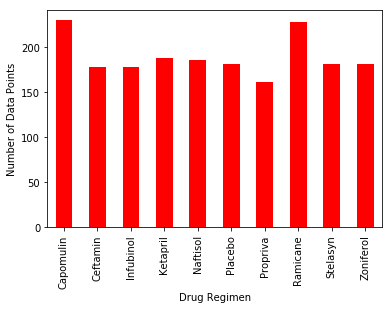

In [778]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

drug_count = mouse_study_complete.groupby("Drug Regimen")["Mouse ID"].count()
drug_count.plot(kind= "bar", color="red")
plt.ylabel("Number of Data Points")


<BarContainer object of 10 artists>

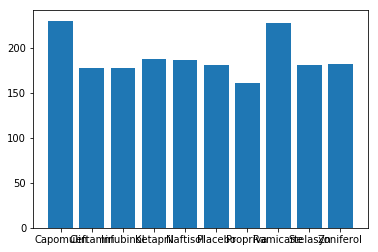

In [779]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_by_mouse = mouse_study_complete.groupby("Drug Regimen")["Mouse ID"].count()
plt.bar(regimen_by_mouse.index, regimen_by_mouse.values)


In [780]:
drug_count.sort_index()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Pie plots

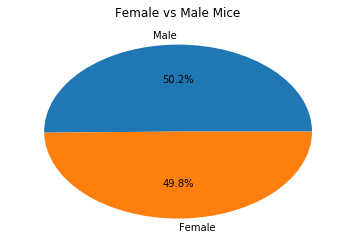

In [781]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = mouse_study_complete.loc[:,['Sex', 'Mouse ID']].drop_duplicates('Mouse ID')
mouse_gender_count = mouse_gender['Sex'].value_counts()
# Create pie plot
gender_pie_pandas = mouse_gender_count.plot(kind='pie',autopct='%1.1F%%',label = '' )
# Create title
gender_pie_pandas.set_title('Female vs Male Mice')
plt.show()

Text(0.5,1,'Female vs Male Mice')

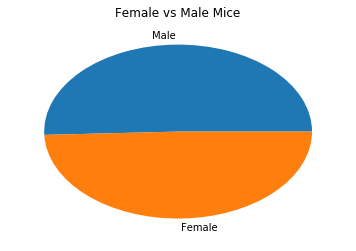

In [782]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_study_complete["Sex"].value_counts(), labels=["Male", "Female"])
ax = plt.subplot()
ax.set_title("Female vs Male Mice")


## Quartiles, outliers and boxplots

In [783]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

promising_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

def printIQR(drug_name, tests):
    # print(tests)
    quartiles = tests["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of Tumor Volume (mm3) for {drug_name} is: {lowerq}")
    print(f"The upper quartile of Tumor Volume (mm3) for {drug_name} is: {upperq}")
    print(f"The interquartile range of Tumor Volume (mm3) for {drug_name} is: {iqr}")
    print(f"The the median of Tumor Volume (mm3) for {drug_name} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    outlier_tvmm3 = tests.loc[(tests['Tumor Volume (mm3)'] < lower_bound) | (tests['Tumor Volume (mm3)'] > upper_bound)]
    return outlier_tvmm3




tests = mouse_study_complete.filter(["Drug Regimen","Mouse ID","Tumor Volume (mm3)"])
t1= tests[tests["Drug Regimen"]=="Capomulin"]
t2= tests[tests["Drug Regimen"]=="Ramicane"]
t3= tests[tests["Drug Regimen"]=="Infubinol"]
t4= tests[tests["Drug Regimen"]=="Ceftamin"]
tests = pd.concat([t1,t2,t3,t4])
last_tvmm3 = tests.groupby("Mouse ID").last()
printIQR(promising_regimens,last_tvmm3)
tests.describe()



The lower quartile of Tumor Volume (mm3) for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] is: 37.187743802499995
The upper quartile of Tumor Volume (mm3) for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] is: 59.930261755000004
The interquartile range of Tumor Volume (mm3) for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] is: 22.74251795250001
The the median of Tumor Volume (mm3) for ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Tumor Volume (mm3)
count,814.000000
mean,45.822556
std,8.293726
min,22.050126
25%,40.220171
50%,45.000000
75%,50.356471
max,72.226731


The lower quartile of Tumor Volume (mm3) for Capomulin is: 32.37735684
The upper quartile of Tumor Volume (mm3) for Capomulin is: 40.1592203
The interquartile range of Tumor Volume (mm3) for Capomulin is: 7.781863460000004
The the median of Tumor Volume (mm3) for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a3bf32090>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3c1b6090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3c1afad0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a3c1b6e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3c1bd3d0>],
 'means': []}

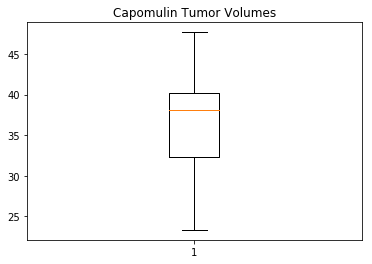

In [784]:
cap_tests = mouse_study_complete.filter(["Drug Regimen","Mouse ID","Tumor Volume (mm3)"])
cap_tests= cap_tests[cap_tests["Drug Regimen"]=="Capomulin"]
cap_last_tvmm3 = cap_tests.groupby("Mouse ID").last()
printIQR("Capomulin",cap_last_tvmm3)
cap_last_tvmm3.describe()


fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Tumor Volumes')
ax1.boxplot(cap_last_tvmm3["Tumor Volume (mm3)"])
# plt.show()


The lower quartile of Tumor Volume (mm3) for Ramicane is: 31.56046955
The upper quartile of Tumor Volume (mm3) for Ramicane is: 40.65900627
The interquartile range of Tumor Volume (mm3) for Ramicane is: 9.098536719999998
The the median of Tumor Volume (mm3) for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a3c32ca90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3c27a190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3c32c890>],
 'medians': [<matplotlib.lines.Line2D at 0x1a3c27ac10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3c281190>],
 'means': []}

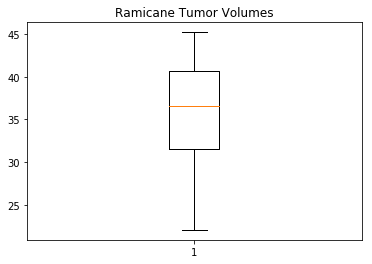

In [785]:
ram_tests = mouse_study_complete.filter(["Drug Regimen","Mouse ID","Tumor Volume (mm3)"])
ram_tests = ram_tests[ram_tests["Drug Regimen"]=="Ramicane"]
ram_last_tvmm3 = ram_tests.groupby("Mouse ID").last()
printIQR("Ramicane",ram_last_tvmm3)
ram_last_tvmm3.describe()
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Tumor Volumes')
ax1.boxplot(ram_last_tvmm3["Tumor Volume (mm3)"])
# plt.show()


The lower quartile of Tumor Volume (mm3) for Infubinol is: 54.04860769
The upper quartile of Tumor Volume (mm3) for Infubinol is: 65.52574285
The interquartile range of Tumor Volume (mm3) for Infubinol is: 11.477135160000003
The the median of Tumor Volume (mm3) for Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a3c439890>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3c439f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3c439690>],
 'medians': [<matplotlib.lines.Line2D at 0x1a3c440ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3c440f50>],
 'means': []}

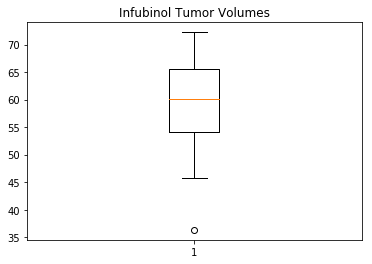

In [786]:
inf_tests = mouse_study_complete.filter(["Drug Regimen","Mouse ID","Tumor Volume (mm3)"])
inf_tests = inf_tests[inf_tests["Drug Regimen"]=="Infubinol"]
inf_last_tvmm3 = inf_tests.groupby("Mouse ID").last()
printIQR("Infubinol",inf_last_tvmm3)
inf_last_tvmm3.describe()

fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Tumor Volumes')
ax1.boxplot(inf_last_tvmm3["Tumor Volume (mm3)"])


The lower quartile of Tumor Volume (mm3) for Ceftamin is: 48.72207785
The upper quartile of Tumor Volume (mm3) for Ceftamin is: 64.29983003
The interquartile range of Tumor Volume (mm3) for Ceftamin is: 15.577752179999997
The the median of Tumor Volume (mm3) for Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1a3c3ae390>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3c3ae710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3c3ae190>],
 'medians': [<matplotlib.lines.Line2D at 0x1a3c3b5d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3c3b5350>],
 'means': []}

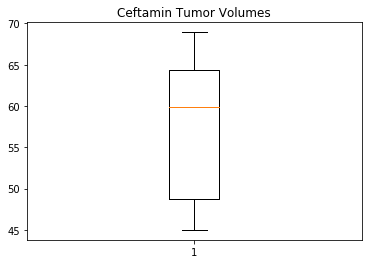

In [787]:
cef_tests = mouse_study_complete.filter(["Drug Regimen","Mouse ID","Tumor Volume (mm3)"])
cef_tests = cef_tests[cef_tests["Drug Regimen"]=="Ceftamin"]
cef_last_tvmm3 = cef_tests.groupby("Mouse ID").last()
printIQR("Ceftamin",cef_last_tvmm3)
cef_last_tvmm3.describe()

fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Tumor Volumes')
ax1.boxplot(cef_last_tvmm3["Tumor Volume (mm3)"])

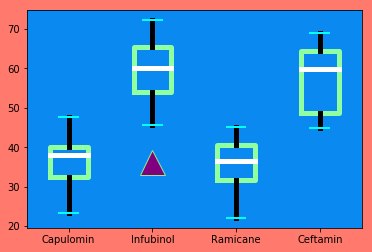

In [788]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

 
flierprops = dict(marker='+', markerfacecolor='purple', markersize=25,
                  linestyle='none', markeredgecolor='lightgreen')


bp = ax1.boxplot([cap_last_tvmm3["Tumor Volume (mm3)"], inf_last_tvmm3["Tumor Volume (mm3)"], ram_last_tvmm3["Tumor Volume (mm3)"],cef_last_tvmm3["Tumor Volume (mm3)"]], flierprops=flierprops )
ax1.set_facecolor((.04, .54, 0.94))
fig1.patch.set_facecolor('xkcd:salmon')


for box in bp['boxes']:
    # change outline color
    box.set( color='xkcd:mint green', linewidth=5)
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=5)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='aqua', linewidth=2)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='white', linewidth=5)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='^', color='orange', alpha=1, )
ax1.set_xticklabels(["Capulomin", "Infubinol", "Ramicane", "Ceftamin"])



 
plt.savefig('foo.png')

## Line and scatter plots

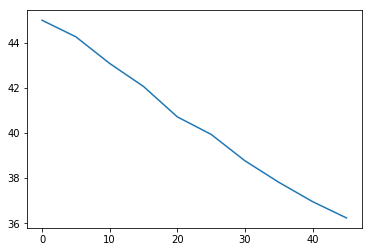

In [789]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_tests= mouse_study_complete[mouse_study_complete["Drug Regimen"]=='Capomulin']
plt.plot(cap_tests.groupby("Timepoint")["Tumor Volume (mm3)"].mean())




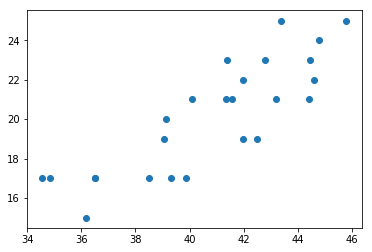

In [790]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


cap_means=cap_tests.groupby(["Mouse ID"]).mean()
x_axis = cap_means["Tumor Volume (mm3)"]
y_axis = cap_means["Weight (g)"]
plt.scatter(x_axis,y_axis)

# weight_by_tvol = pd.DataFrame([cap_tests["Weight (g)"], cap_tests["Tumor Volume (mm3)"]])
# weight_by_tvol = weight_by_tvol.T
# weight_by_tvol.plot.scatter("Weight (g)", "Tumor Volume (mm3)")

In [791]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# correlation coefficient
correlation = st.pearsonr(cap_tests["Weight (g)"], cap_tests["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.53


y = 0.74x + -10.15


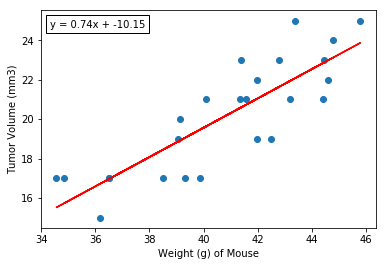

In [792]:
cap_tests= mouse_study_complete[mouse_study_complete["Drug Regimen"]=='Capomulin']
cap_means=cap_tests.groupby(["Mouse ID"]).mean()
x_values = cap_means["Tumor Volume (mm3)"]
y_values = cap_means["Weight (g)"]

fig = plt.figure()
ax=fig.add_subplot(111)
# x_values = cap_tests["Weight (g)"]
# y_values = cap_tests["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
anchored_text = AnchoredText(line_eq, loc=2)
ax.annotate(line_eq,(25, 10),fontsize=10,color="red")
ax.add_artist(anchored_text)
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g) of Mouse')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

**Inferences**
 1. Tumor volume increases with body mass, with a correllation of .53 
 2. Capomulin regimen did decrease tumor volume.
 3. Tumor volume only had a single outlier among 4 promising regimens, indicating that tumors behave somewhat predictably? 
 4. 17-gram mice held a plurality. 

